In [1]:
import os
from typing import Tuple, Callable, Dict, Optional, List

import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from HyperparameterTuning.SearchBayesianSkopt import SearchBayesianSkopt
from HyperparameterTuning.SearchAbstractClass import SearchInputRecommenderArgs
from Recommenders.DataIO import DataIO
from skopt.space import Real, Integer, Categorical
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender,MultiThreadSLIM_SLIMElasticNetRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIM_S_ElasticNetRecommender
np.random.seed(2498)


columns_name = ['user_id','item_id','impression_list','data']

dataset_l = pd.read_csv('/Users/loren/Documents/GitHub/RecSys/dati/data_ICM_length.csv', sep=',')
dataset_t = pd.read_csv('/Users/loren/Documents/GitHub/RecSys/dati/data_ICM_type.csv', sep=',')
dataset = pd.read_csv('/Users/loren/Documents/GitHub/RecSys/dati/interactions_and_impressions.csv', sep=',')
test_users = pd.read_csv('/Users/loren/Documents/GitHub/RecSys/dati/data_target_users_test.csv',sep = ',')
dataset.columns = columns_name

c:\Users\loren\anaconda3\envs\RecSysFramework\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
len(dataset.item_id.unique()),dataset.item_id.unique().min(),dataset.item_id.unique().max()

(24507, 0, 24506)

In [2]:
from Data_manager.Build_Matrix.Data_import import build_ICM_type,build_ICM_lengh,build_URM_ICM_onlyURM_item
import scipy.sparse as sps
URM_ALL,ICM=build_URM_ICM_onlyURM_item(dataset, dataset_t, dataset_l)
ICM_TYPE   =build_ICM_type(dataset_t)
ICM_LENGHT =build_ICM_lengh(dataset_l)
ICM_genre_subgenre = sps.hstack((ICM_TYPE, ICM_LENGHT));

In [3]:
rows = int(41629/3)
rows

13876

In [5]:
URM_slice = URM_ALL[:rows]

In [4]:
URM_train_validation, URM_test = split_train_in_two_percentage_global_sample(URM_ALL, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 697 ( 1.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 308 ( 0.7%) Users that have less than 1 test interactions


In [17]:
#best_hyperparameters = search_metadata["hyperparameters_best"]
param_0 = {'topK': 564, 'l1_ratio': 0.007775287635936031, 'alpha': 0.002147938910249252}
param_1 = {'topK': 5566, 'l1_ratio': 0.001400107977891441, 'alpha': 0.0013526440430809482}
stacked_URM_2 = sps.vstack([URM_train, ICM_TYPE.T])
recommender_object_2 = SLIMElasticNetRecommender(stacked_URM_2)

In [21]:
recommender_object_2_multi = MultiThreadSLIM_SLIMElasticNetRecommender(stacked_URM_2)

In [22]:
recommender_object_2_multi.fit(**param_1)
evaluator_test.evaluateRecommender(recommender_object_2)

100%|█████████▉| 24504/24507 [12:48<00:00, 41.29it/s]

EvaluatorHoldout: Processed 41321 (100.0%) in 38.72 sec. Users per second: 1067


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.060778                 0.082783  0.071888  0.029148    0.039225   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.186955  0.084247  0.065868  0.385155      0.231663  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.382306    0.992601        0.02338   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10             9.10842                   0.994897             0.045578   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [23]:
recommender_object_2_multi_1 = MultiThreadSLIM_SLIMElasticNetRecommender(stacked_URM_2)
recommender_object_2_multi_1.fit(**param_0)
evaluator_test.evaluateRecommender(recommender_object_2)

100%|█████████▉| 24504/24507 [21:31<00:00, 18.98it/s]


EvaluatorHoldout: Processed 41321 (100.0%) in 36.64 sec. Users per second: 1128


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.060778                 0.082783  0.071888  0.029148    0.039225   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.186955  0.084247  0.065868  0.385155      0.231663  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.382306    0.992601        0.02338   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10             9.10842                   0.994897             0.045578   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [18]:
recommender_object_2.fit(**param_1)
evaluator_test.evaluateRecommender(recommender_object_2)

SLIMElasticNetRecommender: Processed 4756 (19.4%) in 5.00 min. Items per second: 15.85
SLIMElasticNetRecommender: Processed 10025 (40.9%) in 10.00 min. Items per second: 16.71
SLIMElasticNetRecommender: Processed 14873 (60.7%) in 15.00 min. Items per second: 16.52
SLIMElasticNetRecommender: Processed 19768 (80.7%) in 20.00 min. Items per second: 16.47
SLIMElasticNetRecommender: Processed 24507 (100.0%) in 24.57 min. Items per second: 16.62
EvaluatorHoldout: Processed 41321 (100.0%) in 36.75 sec. Users per second: 1124


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.060587                 0.082375  0.071558  0.029122    0.039131   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.187064  0.084048  0.065617  0.384792      0.231639  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.381945    0.992601       0.022467   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            8.950776                   0.993486             0.043797   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [19]:
recommender_object_2.fit(**param_0)
evaluator_test.evaluateRecommender(recommender_object_2)

SLIMElasticNetRecommender: Processed 5234 (21.4%) in 5.00 min. Items per second: 17.44
SLIMElasticNetRecommender: Processed 10392 (42.4%) in 10.00 min. Items per second: 17.32
SLIMElasticNetRecommender: Processed 15736 (64.2%) in 15.00 min. Items per second: 17.48
SLIMElasticNetRecommender: Processed 21026 (85.8%) in 20.00 min. Items per second: 17.52
SLIMElasticNetRecommender: Processed 24507 (100.0%) in 23.40 min. Items per second: 17.45
EvaluatorHoldout: Processed 41321 (100.0%) in 35.48 sec. Users per second: 1165


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.060778                 0.082783  0.071888  0.029148    0.039225   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.186955  0.084247  0.065868  0.385155      0.231663  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.382306    0.992601        0.02338   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10             9.10842                   0.994897             0.045578   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [7]:
param = {'l1_ratio': 0.03252687169113758, 'topK': 5049, 'alpha': 0.001, 'workers': 4, 'mw': 1}
reccomender = MultiThreadSLIM_SLIM_S_ElasticNetRecommender(URM_train,ICM_TYPE)
reccomender.fit(**param)

100%|█████████▉| 24488/24507 [09:24<00:00, 60.20it/s]

In [25]:
param = {'l1_ratio': 0.03252687169113758, 'topK': 5049, 'alpha': 0.001, 'workers': 4, 'mw': 1}
reccomender = MultiThreadSLIM_SLIM_S_ElasticNetRecommender(URM_train,ICM_TYPE)
reccomender.fit(**param)
evaluator_test.evaluateRecommender(reccomender)

100%|█████████▉| 24504/24507 [09:10<00:00, 54.82it/s]

EvaluatorHoldout: Processed 41321 (100.0%) in 34.76 sec. Users per second: 1189


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.059466                 0.080632  0.069841  0.028598    0.038286   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.184193  0.082427  0.064237  0.378452      0.227811  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.375652    0.992601       0.027603   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            9.240387                   0.994567              0.05381   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [8]:
evaluator_test.evaluateRecommender(reccomender)

100%|█████████▉| 24504/24507 [09:40<00:00, 60.20it/s]

EvaluatorHoldout: Processed 41321 (100.0%) in 36.59 sec. Users per second: 1129


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.059469                 0.080638  0.069847  0.028598    0.038287   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.184194  0.082429  0.064241  0.378476      0.227812  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.992601          0.375676    0.992601       0.027603   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            9.240347                   0.994567             0.053809   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

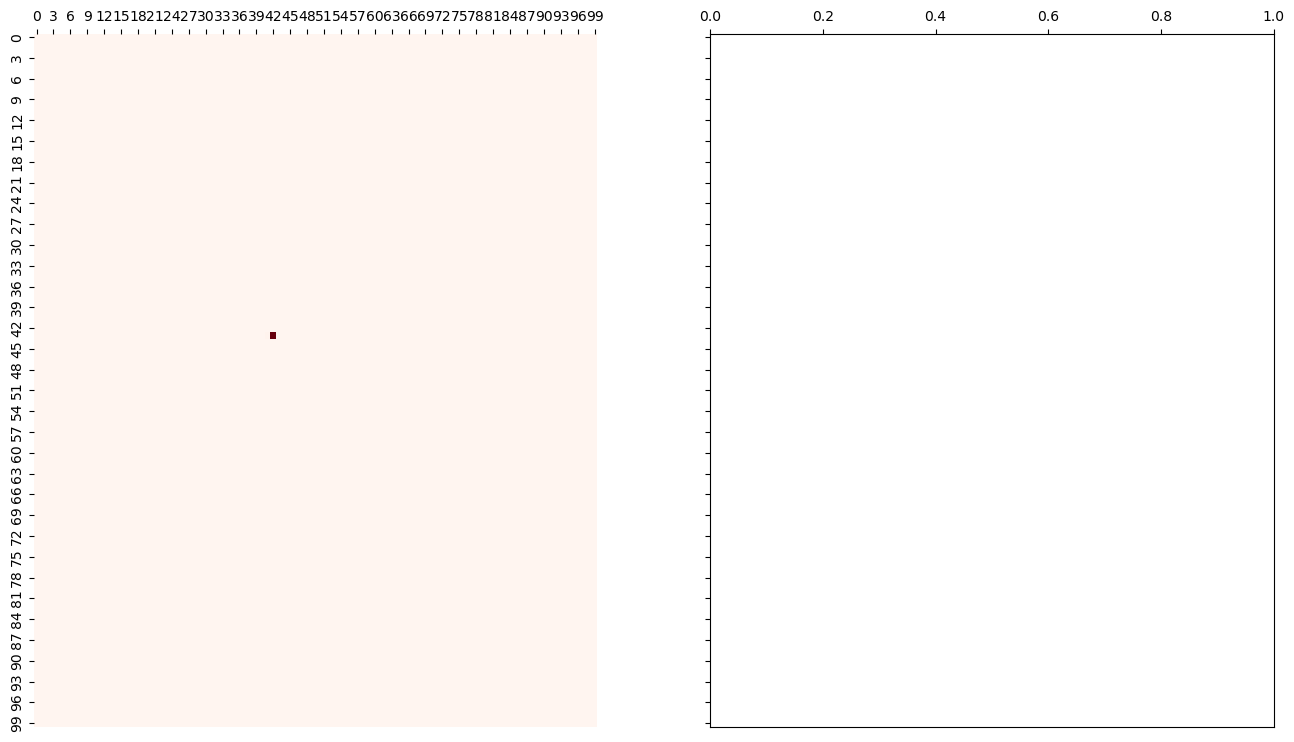

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


simMatrix1 = reccomender.W_sparse
simMatrix2 = recommender_object_2.W_sparse
simMatrix3 = simMatrix1 - simMatrix2 
#vmax = np.max([simMatrix1.max(),simMatrix2.max()])
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
sns.heatmap(simMatrix3[:100, :100].todense(), cbar=False, vmin=0.05, ax=ax1, cmap="Reds")
#sns.heatmap(simMatrix2[:100, :100].todense(), cbar=False, vmin=0, vmax=vmax, ax=ax2, cmap="Reds")
ax1.xaxis.set_ticks_position("top")
ax2.xaxis.set_ticks_position("top")

In [7]:
import os

output_folder_path = "result_experiments_SLIMElasticNetRecommender_URM_slice"

# If directory does not exist, create
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

n_cases = 500
n_random_starts = int(n_cases*0.3)
metric_to_optimize = "MAP"   
cutoff_to_optimize = 10

hyperparameters_range_dictionary = {
        "l1_ratio": Real(low = 1e-5, high = 0.1, prior = 'log-uniform'),
        "topK": Integer(200, 6000),
        "alpha": Real(low = 1e-5, high = 0.1, prior = 'uniform'),
        "workers": Categorical([2]),
        "mw": Integer(0, 10),
    }

earlystopping_keywargs = {"validation_every_n": 5,
                              "stop_on_validation": True,
                              "evaluator_object": URM_validation,
                              "lower_validations_allowed": 5,
                              "validation_metric": metric_to_optimize,
                              }
recommender_input_args = SearchInputRecommenderArgs(
                CONSTRUCTOR_POSITIONAL_ARGS = [URM_train,ICM_TYPE],
                CONSTRUCTOR_KEYWORD_ARGS = {},
                FIT_POSITIONAL_ARGS = [],
                FIT_KEYWORD_ARGS = {},
                EARLYSTOPPING_KEYWORD_ARGS = {},
            )

recommender_class = MultiThreadSLIM_SLIM_S_ElasticNetRecommender


hyperparameterSearch = SearchBayesianSkopt(recommender_class,
                                        evaluator_validation=evaluator_validation,
                                        evaluator_test=evaluator_test)

In [8]:
hyperparameterSearch.search(recommender_input_args,
                    hyperparameter_search_space = hyperparameters_range_dictionary,
                    n_cases = n_cases,
                    n_random_starts = n_random_starts,
                    save_model = "last",
                    output_folder_path = output_folder_path, # Where to save the results
                    output_file_name_root = recommender_class.RECOMMENDER_NAME, # How to call the files
                    metric_to_optimize = metric_to_optimize,
                    cutoff_to_optimize = cutoff_to_optimize,
                    resume_from_saved = True,
                    recommender_input_args_last_test=recommender_input_args
                    )

  0%|          | 0/24507 [00:00<?, ?it/s]

SearchBayesianSkopt: Resuming 'SLIMElasticNetRecommender'... Loaded 1 configurations.
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0000
Function value obtained: -0.0221
Current minimum: -0.0221
Iteration No: 2 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.05073047205592572, 'topK': 2328, 'alpha': 0.006213814412832401, 'workers': 2, 'mw': 8}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [20:54<00:00, 18.68it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 18.97 sec. Users per second: 720
SearchBayesianSkopt: Config 1 is suboptimal. Config: {'l1_ratio': 0.05073047205592572, 'topK': 2328, 'alpha': 0.006213814412832401, 'workers': 2, 'mw': 8} - results: PRECISION: 0.0451504, PRECISION_RECALL_MIN_DEN: 0.0697059, RECALL: 0.0639021, MAP: 0.0205499, MAP_MIN_DEN: 0.0315411, MRR: 0.1470429, NDCG: 0.0675330, F1: 0.0529141, HIT_RATE: 0.3194495, ARHR_ALL_HITS: 0.1728429, NOVELTY: 0.0042149, AVERAGE_POPULARITY: 0.2230444, DIVERSITY_MEAN_INTER_LIST: 0.9233263, DIVERSITY_HERFINDAHL: 0.9923259, COVERAGE_ITEM: 0.2342188, COVERAGE_ITEM_HIT: 0.0232587, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3144999, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0217764, SHANNON_ENTROPY: 8.6222957, RATIO_DIVERSITY_HERFINDAHL: 0.9926504, RATIO_DIVERSITY_GINI: 0.0445672, RATIO_SHANNON_ENTROPY: 0.6393040, RATIO_AVERAGE_POPULARITY: 4.1425211, RATIO_NOVELTY: 0.2826547, 



Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1289.6205
Function value obtained: -0.0205
Current minimum: -0.0221
Iteration No: 3 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 1.0634012403159163e-05, 'topK': 4142, 'alpha': 0.0406610294244688, 'workers': 2, 'mw': 8}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [24:52<00:00, 16.42it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 23.67 sec. Users per second: 577
SearchBayesianSkopt: Config 2 is suboptimal. Config: {'l1_ratio': 1.0634012403159163e-05, 'topK': 4142, 'alpha': 0.0406610294244688, 'workers': 2, 'mw': 8} - results: PRECISION: 0.0444111, PRECISION_RECALL_MIN_DEN: 0.0689248, RECALL: 0.0633777, MAP: 0.0198130, MAP_MIN_DEN: 0.0306515, MRR: 0.1423915, NDCG: 0.0660154, F1: 0.0522257, HIT_RATE: 0.3156431, ARHR_ALL_HITS: 0.1669222, NOVELTY: 0.0039956, AVERAGE_POPULARITY: 0.2753034, DIVERSITY_MEAN_INTER_LIST: 0.8724196, DIVERSITY_HERFINDAHL: 0.9872356, COVERAGE_ITEM: 0.1067450, COVERAGE_ITEM_HIT: 0.0178316, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3107524, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0088793, SHANNON_ENTROPY: 7.6344143, RATIO_DIVERSITY_HERFINDAHL: 0.9875584, RATIO_DIVERSITY_GINI: 0.0181722, RATIO_SHANNON_ENTROPY: 0.5660571, RATIO_AVERAGE_POPULARITY: 5.1131082, RATIO_NOVELTY: 0.2679472, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1486.5688
Function value obtained: -0.0198
Current minimum: -0.0221
Iteration No: 4 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 2.1966441452446192e-05, 'topK': 3216, 'alpha': 0.062438092552784485, 'workers': 2, 'mw': 3}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [21:25<00:00, 21.32it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 22.80 sec. Users per second: 599
SearchBayesianSkopt: Config 3 is suboptimal. Config: {'l1_ratio': 2.1966441452446192e-05, 'topK': 3216, 'alpha': 0.062438092552784485, 'workers': 2, 'mw': 3} - results: PRECISION: 0.0446819, PRECISION_RECALL_MIN_DEN: 0.0699614, RECALL: 0.0644481, MAP: 0.0197430, MAP_MIN_DEN: 0.0305806, MRR: 0.1416600, NDCG: 0.0661543, F1: 0.0527750, HIT_RATE: 0.3192299, ARHR_ALL_HITS: 0.1662759, NOVELTY: 0.0039315, AVERAGE_POPULARITY: 0.2965854, DIVERSITY_MEAN_INTER_LIST: 0.8456951, DIVERSITY_HERFINDAHL: 0.9845633, COVERAGE_ITEM: 0.0929530, COVERAGE_ITEM_HIT: 0.0164443, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3142837, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0071521, SHANNON_ENTROPY: 7.3233096, RATIO_DIVERSITY_HERFINDAHL: 0.9848853, RATIO_DIVERSITY_GINI: 0.0146374, RATIO_SHANNON_ENTROPY: 0.5429901, RATIO_AVERAGE_POPULARITY: 5.5083694, RATIO_NOVELTY: 0.2636498, 



Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1337.1068
Function value obtained: -0.0197
Current minimum: -0.0221
Iteration No: 5 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 1.894966303861455e-05, 'topK': 5115, 'alpha': 0.08043443305105936, 'workers': 2, 'mw': 9}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [31:56<00:00, 12.79it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 24.18 sec. Users per second: 565
SearchBayesianSkopt: Config 4 is suboptimal. Config: {'l1_ratio': 1.894966303861455e-05, 'topK': 5115, 'alpha': 0.08043443305105936, 'workers': 2, 'mw': 9} - results: PRECISION: 0.0428958, PRECISION_RECALL_MIN_DEN: 0.0671071, RECALL: 0.0617730, MAP: 0.0189092, MAP_MIN_DEN: 0.0294035, MRR: 0.1366663, NDCG: 0.0636330, F1: 0.0506322, HIT_RATE: 0.3087622, ARHR_ALL_HITS: 0.1597420, NOVELTY: 0.0039369, AVERAGE_POPULARITY: 0.2945156, DIVERSITY_MEAN_INTER_LIST: 0.8474667, DIVERSITY_HERFINDAHL: 0.9847405, COVERAGE_ITEM: 0.0975640, COVERAGE_ITEM_HIT: 0.0160770, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3039781, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0073477, SHANNON_ENTROPY: 7.3333902, RATIO_DIVERSITY_HERFINDAHL: 0.9850625, RATIO_DIVERSITY_GINI: 0.0150376, RATIO_SHANNON_ENTROPY: 0.5437375, RATIO_AVERAGE_POPULARITY: 5.4699279, RATIO_NOVELTY: 0.2640133, 

Iteration No: 5 ended. Evaluation

  0%|          | 0/24507 [00:00<?, ?it/s]

SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [21:45<00:00, 18.14it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 15.20 sec. Users per second: 899
SearchBayesianSkopt: Config 5 is suboptimal. Config: {'l1_ratio': 0.002910787064645324, 'topK': 5798, 'alpha': 0.07541615238516503, 'workers': 2, 'mw': 2} - results: PRECISION: 0.0433131, PRECISION_RECALL_MIN_DEN: 0.0679815, RECALL: 0.0626290, MAP: 0.0191154, MAP_MIN_DEN: 0.0296871, MRR: 0.1380355, NDCG: 0.0642729, F1: 0.0512102, HIT_RATE: 0.3119098, ARHR_ALL_HITS: 0.1614604, NOVELTY: 0.0039305, AVERAGE_POPULARITY: 0.3023826, DIVERSITY_MEAN_INTER_LIST: 0.8361260, DIVERSITY_HERFINDAHL: 0.9836065, COVERAGE_ITEM: 0.1361244, COVERAGE_ITEM_HIT: 0.0152201, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3070770, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0086679, SHANNON_ENTROPY: 7.2974319, RATIO_DIVERSITY_HERFINDAHL: 0.9839282, RATIO_DIVERSITY_GINI: 0.0177396, RATIO_SHANNON_ENTROPY: 0.5410713, RATIO_AVERAGE_POPULARITY: 5.6160390, RATIO_NOVELTY: 0.2635834, 

Iteration No: 6 ended. Evaluation 

100%|█████████▉| 24504/24507 [36:44<00:00, 11.12it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 23.84 sec. Users per second: 573
SearchBayesianSkopt: Config 6 is suboptimal. Config: {'l1_ratio': 0.0030772679217792665, 'topK': 3178, 'alpha': 0.008081836420571281, 'workers': 2, 'mw': 4} - results: PRECISION: 0.0483274, PRECISION_RECALL_MIN_DEN: 0.0744163, RECALL: 0.0683515, MAP: 0.0218377, MAP_MIN_DEN: 0.0335409, MRR: 0.1538085, NDCG: 0.0716743, F1: 0.0566212, HIT_RATE: 0.3372374, ARHR_ALL_HITS: 0.1823356, NOVELTY: 0.0041413, AVERAGE_POPULARITY: 0.2372218, DIVERSITY_MEAN_INTER_LIST: 0.9123389, DIVERSITY_HERFINDAHL: 0.9912272, COVERAGE_ITEM: 0.1488146, COVERAGE_ITEM_HIT: 0.0257886, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3320121, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0145035, SHANNON_ENTROPY: 8.3258501, RATIO_DIVERSITY_HERFINDAHL: 0.9915514, RATIO_DIVERSITY_GINI: 0.0296826, RATIO_SHANNON_ENTROPY: 0.6173239, RATIO_AVERAGE_POPULARITY: 4.4058329, RATIO_NOVELTY: 0.2777193, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 7 ended. Evaluation done at random point.
Time taken: 1309.1012
Function value obtained: -0.0218
Current minimum: -0.0221
Iteration No: 8 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 1.1367676297640121e-05, 'topK': 1123, 'alpha': 0.060241799153319134, 'workers': 2, 'mw': 10}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [24:17<00:00, 17.34it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 22.88 sec. Users per second: 597
SearchBayesianSkopt: Config 7 is suboptimal. Config: {'l1_ratio': 1.1367676297640121e-05, 'topK': 1123, 'alpha': 0.060241799153319134, 'workers': 2, 'mw': 10} - results: PRECISION: 0.0433350, PRECISION_RECALL_MIN_DEN: 0.0674557, RECALL: 0.0620548, MAP: 0.0191572, MAP_MIN_DEN: 0.0296531, MRR: 0.1376497, NDCG: 0.0641256, F1: 0.0510324, HIT_RATE: 0.3092746, ARHR_ALL_HITS: 0.1613817, NOVELTY: 0.0039722, AVERAGE_POPULARITY: 0.2822664, DIVERSITY_MEAN_INTER_LIST: 0.8630922, DIVERSITY_HERFINDAHL: 0.9863029, COVERAGE_ITEM: 0.1002571, COVERAGE_ITEM_HIT: 0.0169339, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3044826, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0081479, SHANNON_ENTROPY: 7.5083369, RATIO_DIVERSITY_HERFINDAHL: 0.9866255, RATIO_DIVERSITY_GINI: 0.0166753, RATIO_SHANNON_ENTROPY: 0.5567090, RATIO_AVERAGE_POPULARITY: 5.2424287, RATIO_NOVELTY: 0.2663824, 



Iteration No: 8 ended. Evaluation done at random point.
Time taken: 1486.1060
Function value obtained: -0.0192
Current minimum: -0.0221
Iteration No: 9 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.00031481165414139363, 'topK': 1809, 'alpha': 0.0831636423900514, 'workers': 2, 'mw': 6}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [47:49<00:00,  8.54it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 24.61 sec. Users per second: 555
SearchBayesianSkopt: Config 8 is suboptimal. Config: {'l1_ratio': 0.00031481165414139363, 'topK': 1809, 'alpha': 0.0831636423900514, 'workers': 2, 'mw': 6} - results: PRECISION: 0.0431301, PRECISION_RECALL_MIN_DEN: 0.0674980, RECALL: 0.0621468, MAP: 0.0191623, MAP_MIN_DEN: 0.0298186, MRR: 0.1383838, NDCG: 0.0642689, F1: 0.0509209, HIT_RATE: 0.3090550, ARHR_ALL_HITS: 0.1618563, NOVELTY: 0.0039272, AVERAGE_POPULARITY: 0.2981944, DIVERSITY_MEAN_INTER_LIST: 0.8424403, DIVERSITY_HERFINDAHL: 0.9842379, COVERAGE_ITEM: 0.0960542, COVERAGE_ITEM_HIT: 0.0158322, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3042664, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0071692, SHANNON_ENTROPY: 7.2886390, RATIO_DIVERSITY_HERFINDAHL: 0.9845597, RATIO_DIVERSITY_GINI: 0.0146723, RATIO_SHANNON_ENTROPY: 0.5404194, RATIO_AVERAGE_POPULARITY: 5.5382540, RATIO_NOVELTY: 0.2633623, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 9 ended. Evaluation done at random point.
Time taken: 1536.7427
Function value obtained: -0.0192
Current minimum: -0.0221
Iteration No: 10 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.0013393223261489939, 'topK': 1049, 'alpha': 0.06001162735204942, 'workers': 2, 'mw': 1}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [13:16<00:00, 38.31it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 20.41 sec. Users per second: 669
SearchBayesianSkopt: Config 9 is suboptimal. Config: {'l1_ratio': 0.0013393223261489939, 'topK': 1049, 'alpha': 0.06001162735204942, 'workers': 2, 'mw': 1} - results: PRECISION: 0.0446966, PRECISION_RECALL_MIN_DEN: 0.0702005, RECALL: 0.0646667, MAP: 0.0197582, MAP_MIN_DEN: 0.0306711, MRR: 0.1418108, NDCG: 0.0662829, F1: 0.0528583, HIT_RATE: 0.3194495, ARHR_ALL_HITS: 0.1663789, NOVELTY: 0.0039276, AVERAGE_POPULARITY: 0.2987413, DIVERSITY_MEAN_INTER_LIST: 0.8427928, DIVERSITY_HERFINDAHL: 0.9842731, COVERAGE_ITEM: 0.0990737, COVERAGE_ITEM_HIT: 0.0159546, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3144999, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0071729, SHANNON_ENTROPY: 7.2945161, RATIO_DIVERSITY_HERFINDAHL: 0.9845950, RATIO_DIVERSITY_GINI: 0.0146800, RATIO_SHANNON_ENTROPY: 0.5408551, RATIO_AVERAGE_POPULARITY: 5.5484099, RATIO_NOVELTY: 0.2633908, 



Iteration No: 10 ended. Evaluation done at random point.
Time taken: 800.9968
Function value obtained: -0.0198
Current minimum: -0.0221
Iteration No: 11 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.07470634844925325, 'topK': 1846, 'alpha': 0.0014202422523101976, 'workers': 2, 'mw': 4}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.























































































































































































































































































































































100%|█████████▉| 24504/24507 [23:06<00:00, 17.67it/s]












































































































































































































































































































































































































































EvaluatorHoldout: Processed 13661 (100.0%) in 18.89 sec. Users per second: 723
SearchBayesianSkopt: Config 10 is suboptimal. Config: {'l1_ratio': 0.07470634844925325, 'topK': 1846, 'alpha': 0.0014202422523101976, 'workers': 2, 'mw': 4} - results: PRECISION: 0.0473977, PRECISION_RECALL_MIN_DEN: 0.0723698, RECALL: 0.0662298, MAP: 0.0217627, MAP_MIN_DEN: 0.0333001, MRR: 0.1543613, NDCG: 0.0707877, F1: 0.0552532, HIT_RATE: 0.3306493, ARHR_ALL_HITS: 0.1822931, NOVELTY: 0.0044325, AVERAGE_POPULARITY: 0.1927654, DIVERSITY_MEAN_INTER_LIST: 0.9443677, DIVERSITY_HERFINDAHL: 0.9944299, COVERAGE_ITEM: 0.3732811, COVERAGE_ITEM_HIT: 0.0317052, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3255261, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0480011, SHANNON_ENTROPY: 9.5032470, RATIO_DIVERSITY_HERFINDAHL: 0.9947551, RATIO_DIVERSITY_GINI: 0.0982382, RATIO_SHANNON_ENTROPY: 0.7046225, RATIO_AVERAGE_POPULARITY: 3.5801603, RATIO_NOVELTY: 0.2972448, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 11 ended. Evaluation done at random point.
Time taken: 1250.4211
Function value obtained: -0.0218
Current minimum: -0.0221
Iteration No: 12 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.052880942747388256, 'topK': 4776, 'alpha': 0.05771324002979992, 'workers': 2, 'mw': 9}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [26:12<00:00, 15.90it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 23.93 sec. Users per second: 571
SearchBayesianSkopt: Config 11 is suboptimal. Config: {'l1_ratio': 0.052880942747388256, 'topK': 4776, 'alpha': 0.05771324002979992, 'workers': 2, 'mw': 9} - results: PRECISION: 0.0360955, PRECISION_RECALL_MIN_DEN: 0.0551095, RECALL: 0.0503316, MAP: 0.0159325, MAP_MIN_DEN: 0.0244585, MRR: 0.1184378, NDCG: 0.0534066, F1: 0.0420410, HIT_RATE: 0.2671840, ARHR_ALL_HITS: 0.1365224, NOVELTY: 0.0040626, AVERAGE_POPULARITY: 0.2595314, DIVERSITY_MEAN_INTER_LIST: 0.8839299, DIVERSITY_HERFINDAHL: 0.9883865, COVERAGE_ITEM: 0.1758273, COVERAGE_ITEM_HIT: 0.0142000, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.2630441, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0134503, SHANNON_ENTROPY: 7.8791426, RATIO_DIVERSITY_HERFINDAHL: 0.9887098, RATIO_DIVERSITY_GINI: 0.0275271, RATIO_SHANNON_ENTROPY: 0.5842025, RATIO_AVERAGE_POPULARITY: 4.8201801, RATIO_NOVELTY: 0.2724403, 

Iteration No: 12 ended. Evaluatio

SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [47:33<00:00,  8.59it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 26.10 sec. Users per second: 523
SearchBayesianSkopt: Config 12 is suboptimal. Config: {'l1_ratio': 0.0007333873012480962, 'topK': 5023, 'alpha': 0.04046925013087676, 'workers': 2, 'mw': 6} - results: PRECISION: 0.0450113, PRECISION_RECALL_MIN_DEN: 0.0697924, RECALL: 0.0641525, MAP: 0.0200739, MAP_MIN_DEN: 0.0309931, MRR: 0.1437457, NDCG: 0.0667720, F1: 0.0529038, HIT_RATE: 0.3189371, ARHR_ALL_HITS: 0.1688421, NOVELTY: 0.0040003, AVERAGE_POPULARITY: 0.2749619, DIVERSITY_MEAN_INTER_LIST: 0.8727543, DIVERSITY_HERFINDAHL: 0.9872690, COVERAGE_ITEM: 0.1153956, COVERAGE_ITEM_HIT: 0.0179132, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3139954, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0093476, SHANNON_ENTROPY: 7.6622338, RATIO_DIVERSITY_HERFINDAHL: 0.9875919, RATIO_DIVERSITY_GINI: 0.0191306, RATIO_SHANNON_ENTROPY: 0.5681197, RATIO_AVERAGE_POPULARITY: 5.1067648, RATIO_NOVELTY: 0.2682619, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 13 ended. Evaluation done at random point.
Time taken: 1798.0608
Function value obtained: -0.0201
Current minimum: -0.0221
Iteration No: 14 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.0035218824898726867, 'topK': 2474, 'alpha': 0.054213215908923605, 'workers': 2, 'mw': 0}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [06:53<00:00, 95.88it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 15.88 sec. Users per second: 860
SearchBayesianSkopt: Config 13 is suboptimal. Config: {'l1_ratio': 0.0035218824898726867, 'topK': 2474, 'alpha': 0.054213215908923605, 'workers': 2, 'mw': 0} - results: PRECISION: 0.0443599, PRECISION_RECALL_MIN_DEN: 0.0696880, RECALL: 0.0642083, MAP: 0.0196117, MAP_MIN_DEN: 0.0304735, MRR: 0.1409268, NDCG: 0.0658503, F1: 0.0524697, HIT_RATE: 0.3173267, ARHR_ALL_HITS: 0.1652485, NOVELTY: 0.0038952, AVERAGE_POPULARITY: 0.3004849, DIVERSITY_MEAN_INTER_LIST: 0.8403962, DIVERSITY_HERFINDAHL: 0.9840335, COVERAGE_ITEM: 0.0782225, COVERAGE_ITEM_HIT: 0.0154242, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3124099, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0064512, SHANNON_ENTROPY: 7.2448249, RATIO_DIVERSITY_HERFINDAHL: 0.9843553, RATIO_DIVERSITY_GINI: 0.0132029, RATIO_SHANNON_ENTROPY: 0.5371708, RATIO_AVERAGE_POPULARITY: 5.6152651, RATIO_NOVELTY: 0.2611618, 



Iteration No: 14 ended. Evaluation done at random point.
Time taken: 415.6816
Function value obtained: -0.0196
Current minimum: -0.0221
Iteration No: 15 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.00020146277864019831, 'topK': 4988, 'alpha': 0.04647941698289303, 'workers': 2, 'mw': 4}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.



















































































































































































































































































































































































































































































































































































































100%|█████████▉| 24504/24507 [26:31<00:00, 15.39it/s]






























































































































































































EvaluatorHoldout: Processed 13661 (100.0%) in 24.62 sec. Users per second: 555
SearchBayesianSkopt: Config 14 is suboptimal. Config: {'l1_ratio': 0.00020146277864019831, 'topK': 4988, 'alpha': 0.04647941698289303, 'workers': 2, 'mw': 4} - results: PRECISION: 0.0455091, PRECISION_RECALL_MIN_DEN: 0.0709562, RECALL: 0.0652961, MAP: 0.0201471, MAP_MIN_DEN: 0.0311261, MRR: 0.1438655, NDCG: 0.0672456, F1: 0.0536359, HIT_RATE: 0.3220848, ARHR_ALL_HITS: 0.1692243, NOVELTY: 0.0039719, AVERAGE_POPULARITY: 0.2834642, DIVERSITY_MEAN_INTER_LIST: 0.8626870, DIVERSITY_HERFINDAHL: 0.9862624, COVERAGE_ITEM: 0.1057249, COVERAGE_ITEM_HIT: 0.0175460, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3170943, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0083802, SHANNON_ENTROPY: 7.5282444, RATIO_DIVERSITY_HERFINDAHL: 0.9865849, RATIO_DIVERSITY_GINI: 0.0171508, RATIO_SHANNON_ENTROPY: 0.5581850, RATIO_AVERAGE_POPULARITY: 5.2646749, RATIO_NOVELTY: 0.2663599, 

Iteration No: 15 ended. Evaluat

100%|█████████▉| 24504/24507 [22:44<00:00, 32.19it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 21.53 sec. Users per second: 634
SearchBayesianSkopt: Config 15 is suboptimal. Config: {'l1_ratio': 0.029522250167290057, 'topK': 5544, 'alpha': 0.024501918590349395, 'workers': 2, 'mw': 6} - results: PRECISION: 0.0426030, PRECISION_RECALL_MIN_DEN: 0.0656605, RECALL: 0.0601595, MAP: 0.0193429, MAP_MIN_DEN: 0.0297245, MRR: 0.1398550, NDCG: 0.0637948, F1: 0.0498815, HIT_RATE: 0.3037113, ARHR_ALL_HITS: 0.1634428, NOVELTY: 0.0040748, AVERAGE_POPULARITY: 0.2566484, DIVERSITY_MEAN_INTER_LIST: 0.8917617, DIVERSITY_HERFINDAHL: 0.9891696, COVERAGE_ITEM: 0.1792549, COVERAGE_ITEM_HIT: 0.0162811, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.2990055, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0140944, SHANNON_ENTROPY: 7.9953195, RATIO_DIVERSITY_HERFINDAHL: 0.9894931, RATIO_DIVERSITY_GINI: 0.0288453, RATIO_SHANNON_ENTROPY: 0.5928165, RATIO_AVERAGE_POPULARITY: 4.7666351, RATIO_NOVELTY: 0.2732607, 

Iteration No: 16 ended. Evaluati

SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


EvaluatorHoldout: Processed 13661 (100.0%) in 20.56 sec. Users per second: 664
SearchBayesianSkopt: Config 16 is suboptimal. Config: {'l1_ratio': 0.0003469035236446849, 'topK': 576, 'alpha': 0.03580733011727581, 'workers': 2, 'mw': 4} - results: PRECISION: 0.0460069, PRECISION_RECALL_MIN_DEN: 0.0714694, RECALL: 0.0657466, MAP: 0.0205259, MAP_MIN_DEN: 0.0316966, MRR: 0.1464496, NDCG: 0.0682224, F1: 0.0541334, HIT_RATE: 0.3254520, ARHR_ALL_HITS: 0.1723920, NOVELTY: 0.0040124, AVERAGE_POPULARITY: 0.2703432, DIVERSITY_MEAN_INTER_LIST: 0.8781315, DIVERSITY_HERFINDAHL: 0.9878067, COVERAGE_ITEM: 0.1162525, COVERAGE_ITEM_HIT: 0.0189334, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3204093, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0096297, SHANNON_ENTROPY: 7.7224411, RATIO_DIVERSITY_HERFINDAHL: 0.9881298, RATIO_DIVERSITY_GINI: 0.0197079, RATIO_SHANNON_ENTROPY: 0.5725838, RATIO_AVERAGE_POPULARITY: 5.0209832, RATIO_NOVELTY: 0.2690729, 



Iteration No: 17 ended. Evaluation done at random point.
Time taken: 1117.7812
Function value obtained: -0.0205
Current minimum: -0.0221
Iteration No: 18 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 4.8614253303331475e-05, 'topK': 3439, 'alpha': 0.021913494942864063, 'workers': 2, 'mw': 9}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.























100%|█████████▉| 24504/24507 [19:25<00:00, 21.03it/s]

















































































































































































































































































































































































































































































































































































































































































































































































EvaluatorHoldout: Processed 13661 (100.0%) in 23.64 sec. Users per second: 578
SearchBayesianSkopt: Config 17 is suboptimal. Config: {'l1_ratio': 4.8614253303331475e-05, 'topK': 3439, 'alpha': 0.021913494942864063, 'workers': 2, 'mw': 9} - results: PRECISION: 0.0450772, PRECISION_RECALL_MIN_DEN: 0.0696770, RECALL: 0.0639852, MAP: 0.0202663, MAP_MIN_DEN: 0.0312738, MRR: 0.1451028, NDCG: 0.0671020, F1: 0.0528922, HIT_RATE: 0.3183515, ARHR_ALL_HITS: 0.1704236, NOVELTY: 0.0040497, AVERAGE_POPULARITY: 0.2591992, DIVERSITY_MEAN_INTER_LIST: 0.8907539, DIVERSITY_HERFINDAHL: 0.9890689, COVERAGE_ITEM: 0.1183335, COVERAGE_ITEM_HIT: 0.0202391, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3134189, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0105151, SHANNON_ENTROPY: 7.8936255, RATIO_DIVERSITY_HERFINDAHL: 0.9893923, RATIO_DIVERSITY_GINI: 0.0215201, RATIO_SHANNON_ENTROPY: 0.5852764, RATIO_AVERAGE_POPULARITY: 4.8140097, RATIO_NOVELTY: 0.2715770, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 18 ended. Evaluation done at random point.
Time taken: 1666.2467
Function value obtained: -0.0203
Current minimum: -0.0221
Iteration No: 19 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.00012964190173414094, 'topK': 5967, 'alpha': 0.07478552119291963, 'workers': 2, 'mw': 7}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [28:15<00:00, 15.89it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 17.36 sec. Users per second: 787
SearchBayesianSkopt: Config 18 is suboptimal. Config: {'l1_ratio': 0.00012964190173414094, 'topK': 5967, 'alpha': 0.07478552119291963, 'workers': 2, 'mw': 7} - results: PRECISION: 0.0436205, PRECISION_RECALL_MIN_DEN: 0.0681883, RECALL: 0.0627738, MAP: 0.0192214, MAP_MIN_DEN: 0.0298680, MRR: 0.1383799, NDCG: 0.0645892, F1: 0.0514732, HIT_RATE: 0.3116902, ARHR_ALL_HITS: 0.1620759, NOVELTY: 0.0039400, AVERAGE_POPULARITY: 0.2940917, DIVERSITY_MEAN_INTER_LIST: 0.8481466, DIVERSITY_HERFINDAHL: 0.9848084, COVERAGE_ITEM: 0.1018893, COVERAGE_ITEM_HIT: 0.0162403, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3068608, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0075936, SHANNON_ENTROPY: 7.3558057, RATIO_DIVERSITY_HERFINDAHL: 0.9851305, RATIO_DIVERSITY_GINI: 0.0155410, RATIO_SHANNON_ENTROPY: 0.5453995, RATIO_AVERAGE_POPULARITY: 5.4620553, RATIO_NOVELTY: 0.2642185, 

Iteration No: 19 ended. Evaluat

100%|█████████▉| 24504/24507 [35:06<00:00, 11.63it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 16.66 sec. Users per second: 820
SearchBayesianSkopt: Config 19 is suboptimal. Config: {'l1_ratio': 0.02229809510499004, 'topK': 1045, 'alpha': 0.011455895143980386, 'workers': 2, 'mw': 6} - results: PRECISION: 0.0456628, PRECISION_RECALL_MIN_DEN: 0.0705548, RECALL: 0.0646974, MAP: 0.0207790, MAP_MIN_DEN: 0.0319848, MRR: 0.1487453, NDCG: 0.0683810, F1: 0.0535386, HIT_RATE: 0.3224508, ARHR_ALL_HITS: 0.1747985, NOVELTY: 0.0041407, AVERAGE_POPULARITY: 0.2378391, DIVERSITY_MEAN_INTER_LIST: 0.9110934, DIVERSITY_HERFINDAHL: 0.9911027, COVERAGE_ITEM: 0.1881911, COVERAGE_ITEM_HIT: 0.0209328, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3174546, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0162386, SHANNON_ENTROPY: 8.3059508, RATIO_DIVERSITY_HERFINDAHL: 0.9914268, RATIO_DIVERSITY_GINI: 0.0332337, RATIO_SHANNON_ENTROPY: 0.6158484, RATIO_AVERAGE_POPULARITY: 4.4172973, RATIO_NOVELTY: 0.2776791, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 20 ended. Evaluation done at random point.
Time taken: 969.6668
Function value obtained: -0.0208
Current minimum: -0.0221
Iteration No: 21 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.00023296716068416337, 'topK': 2352, 'alpha': 0.0041432511516570495, 'workers': 2, 'mw': 0}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [14:05<00:00, 35.79it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 19.64 sec. Users per second: 696
SearchBayesianSkopt: Config 20 is suboptimal. Config: {'l1_ratio': 0.00023296716068416337, 'topK': 2352, 'alpha': 0.0041432511516570495, 'workers': 2, 'mw': 0} - results: PRECISION: 0.0483566, PRECISION_RECALL_MIN_DEN: 0.0745280, RECALL: 0.0683964, MAP: 0.0220013, MAP_MIN_DEN: 0.0336330, MRR: 0.1547316, NDCG: 0.0718853, F1: 0.0566567, HIT_RATE: 0.3347486, ARHR_ALL_HITS: 0.1836331, NOVELTY: 0.0041258, AVERAGE_POPULARITY: 0.2234878, DIVERSITY_MEAN_INTER_LIST: 0.9258650, DIVERSITY_HERFINDAHL: 0.9925797, COVERAGE_ITEM: 0.0894438, COVERAGE_ITEM_HIT: 0.0294202, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3295618, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0125531, SHANNON_ENTROPY: 8.3857506, RATIO_DIVERSITY_HERFINDAHL: 0.9929043, RATIO_DIVERSITY_GINI: 0.0256909, RATIO_SHANNON_ENTROPY: 0.6217652, RATIO_AVERAGE_POPULARITY: 4.1763935, RATIO_NOVELTY: 0.2766240, 



Iteration No: 21 ended. Evaluation done at random point.
Time taken: 852.6026
Function value obtained: -0.0220
Current minimum: -0.0221
Iteration No: 22 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.0005901520090962041, 'topK': 1843, 'alpha': 0.05694031703462883, 'workers': 2, 'mw': 5}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [27:28<00:00, 14.86it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 23.81 sec. Users per second: 574
SearchBayesianSkopt: Config 21 is suboptimal. Config: {'l1_ratio': 0.0005901520090962041, 'topK': 1843, 'alpha': 0.05694031703462883, 'workers': 2, 'mw': 5} - results: PRECISION: 0.0445795, PRECISION_RECALL_MIN_DEN: 0.0695802, RECALL: 0.0640267, MAP: 0.0197138, MAP_MIN_DEN: 0.0304987, MRR: 0.1411602, NDCG: 0.0659365, F1: 0.0525619, HIT_RATE: 0.3173267, ARHR_ALL_HITS: 0.1658009, NOVELTY: 0.0039617, AVERAGE_POPULARITY: 0.2868386, DIVERSITY_MEAN_INTER_LIST: 0.8579792, DIVERSITY_HERFINDAHL: 0.9857916, COVERAGE_ITEM: 0.1026237, COVERAGE_ITEM_HIT: 0.0169339, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3124099, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0080821, SHANNON_ENTROPY: 7.4699767, RATIO_DIVERSITY_HERFINDAHL: 0.9861140, RATIO_DIVERSITY_GINI: 0.0165407, RATIO_SHANNON_ENTROPY: 0.5538647, RATIO_AVERAGE_POPULARITY: 5.3273458, RATIO_NOVELTY: 0.2656729, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 22 ended. Evaluation done at random point.
Time taken: 1393.5905
Function value obtained: -0.0197
Current minimum: -0.0221
Iteration No: 23 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 0.0032085401020119832, 'topK': 2444, 'alpha': 0.03154325324806296, 'workers': 2, 'mw': 6}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [22:14<00:00, 20.80it/s]

EvaluatorHoldout: Processed 13661 (100.0%) in 22.61 sec. Users per second: 604
SearchBayesianSkopt: Config 22 is suboptimal. Config: {'l1_ratio': 0.0032085401020119832, 'topK': 2444, 'alpha': 0.03154325324806296, 'workers': 2, 'mw': 6} - results: PRECISION: 0.0451943, PRECISION_RECALL_MIN_DEN: 0.0700373, RECALL: 0.0643761, MAP: 0.0202484, MAP_MIN_DEN: 0.0312022, MRR: 0.1448691, NDCG: 0.0671408, F1: 0.0531062, HIT_RATE: 0.3195227, ARHR_ALL_HITS: 0.1702100, NOVELTY: 0.0040358, AVERAGE_POPULARITY: 0.2649091, DIVERSITY_MEAN_INTER_LIST: 0.8839568, DIVERSITY_HERFINDAHL: 0.9883892, COVERAGE_ITEM: 0.1345738, COVERAGE_ITEM_HIT: 0.0187701, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3145719, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0108734, SHANNON_ENTROPY: 7.8285486, RATIO_DIVERSITY_HERFINDAHL: 0.9887124, RATIO_DIVERSITY_GINI: 0.0222533, RATIO_SHANNON_ENTROPY: 0.5804512, RATIO_AVERAGE_POPULARITY: 4.9200574, RATIO_NOVELTY: 0.2706445, 



Iteration No: 23 ended. Evaluation done at random point.
Time taken: 1374.3055
Function value obtained: -0.0202
Current minimum: -0.0221
Iteration No: 24 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 9.520314794839346e-05, 'topK': 1963, 'alpha': 0.013540408527539587, 'workers': 2, 'mw': 0}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


100%|█████████▉| 24504/24507 [36:48<00:00, 11.09it/s]


EvaluatorHoldout: Processed 13661 (100.0%) in 22.20 sec. Users per second: 615
SearchBayesianSkopt: Config 23 is suboptimal. Config: {'l1_ratio': 9.520314794839346e-05, 'topK': 1963, 'alpha': 0.013540408527539587, 'workers': 2, 'mw': 0} - results: PRECISION: 0.0486055, PRECISION_RECALL_MIN_DEN: 0.0754034, RECALL: 0.0693683, MAP: 0.0219106, MAP_MIN_DEN: 0.0337221, MRR: 0.1538953, NDCG: 0.0721150, F1: 0.0571598, HIT_RATE: 0.3387746, ARHR_ALL_HITS: 0.1826939, NOVELTY: 0.0040330, AVERAGE_POPULARITY: 0.2508215, DIVERSITY_MEAN_INTER_LIST: 0.9003868, DIVERSITY_HERFINDAHL: 0.9900321, COVERAGE_ITEM: 0.0771208, COVERAGE_ITEM_HIT: 0.0239523, ITEMS_IN_GT: 0.8658751, COVERAGE_USER: 0.9845056, COVERAGE_USER_HIT: 0.3335255, USERS_IN_GT: 0.9845056, DIVERSITY_GINI: 0.0095046, SHANNON_ENTROPY: 7.9512693, RATIO_DIVERSITY_HERFINDAHL: 0.9903559, RATIO_DIVERSITY_GINI: 0.0194520, RATIO_SHANNON_ENTROPY: 0.5895504, RATIO_AVERAGE_POPULARITY: 4.6871871, RATIO_NOVELTY: 0.2704008, 



  0%|          | 0/24507 [00:00<?, ?it/s]

Iteration No: 24 ended. Evaluation done at random point.
Time taken: 933.0170
Function value obtained: -0.0219
Current minimum: -0.0221
Iteration No: 25 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'l1_ratio': 7.550535945977811e-05, 'topK': 1964, 'alpha': 0.02443925930000844, 'workers': 2, 'mw': 9}
SLIMElasticNetRecommender: URM Detected 13 ( 0.1%) items with no interactions.


 59%|█████▉    | 14536/24507 [17:51<11:33, 14.39it/s]

In [12]:
def prepare_submission(urm_train: sp.csr_matrix, recommender: object, test_users: pd.DataFrame):    
    recommendation_length = 10
    submission = []
    for user_id in test_users.user_id:
        recommendations = recommender.recommend(user_id_array=user_id,
                                                cutoff=recommendation_length,
                                                remove_seen_flag=True)
        
        submission.append((user_id, [item_id for item_id in recommendations]))
        
    return submission

submission = prepare_submission(URM_ALL, reccomender1, test_users)


In [15]:
def write_submission(submissions):
    with open("/submission/SLIM_weightICM.csv", "w") as f:
        f.write(f"user_id,item_list\n")
        for user_id, items in submissions:
            f.write(f"{user_id},{' '.join([str(item) for item in items])}\n")
write_submission(submission)